Testing a simple system class, seeing if it can deduce the system true and sensed states from a set of sensed component objects

In [89]:
# add location to path and complete necessary class imports
import sys
sys.path.append('..')
# print(sys.path)

from shipClass.Component import Component
from shipClass.Sensor import Sensor
from shipClass.SensedComp import SensedComp
from shipClass.System import System

In [ ]:
# create one high reliability component and two low-reliability ones
states = { 0: 'Critical Failure',
           1: 'Degredation Failure',
           2: 'Incipent Failure', 
           3: 'Normal Operation'}

high_rel_mat = [[1, 0, 0, 0], 
                [0.4, 0.6, 0, 0],
                [0.2, 0.2, 0.6, 0],
                [0.025, 0.025, 0.05, 0.9]]

low_rel_mat = [[1, 0, 0, 0], 
                [0.5, 0.5, 0, 0],
                [0.2, 0.3, 0.5, 0],
                [0.1, 0.1, 0.2, 0.6]]

comp1 = Component('Comp1_HR', states, low_rel_mat)
comp2 = Component('Comp2_LR', states, low_rel_mat)
comp3 = Component('Comp3_LR', states, low_rel_mat)

# assuming all components will have a default sensor with the same states and matrix (good sensing capability)
sensor_states = {0: 'Faulty',
                 1: 'Normal Operation'}
sensor_mat = [[1, 0],
              [0.5, 0.5]]
default_sensor = Sensor('default_sensor', sensor_states, sensor_mat)

# initialize three sensed components, one sensor attached to each component
# the sensor is the same for all three components, but they can be different if desired
sc1 = SensedComp(comp1, default_sensor)
sc2 = SensedComp(comp2, default_sensor)
sc3 = SensedComp(comp3, default_sensor)

In [91]:
# create a system from the sensed components
sensed_components = [sc1, sc2, sc3]

sys = System('test_system', sensed_components)
sys.outputSystemStates()

Component  State Sensed State
Sensed Comp1_HR 3     3         
Sensed Comp2_LR 3     3         
Sensed Comp3_LR 3     3         
System State: 3


### Simulating a series system

Step:  0
Component  State Sensed State
Sensed Comp1_HR 3     3         
Sensed Comp2_LR 1     1         
Sensed Comp3_LR 3     3         
System State: 1

Step:  1
Component  State Sensed State
Sensed Comp1_HR 3     3         
Sensed Comp2_LR 0     3         
Sensed Comp3_LR 3     3         
System State: 0

Step:  2
Component  State Sensed State
Sensed Comp1_HR 3     3         
Sensed Comp2_LR 0     3         
Sensed Comp3_LR 3     3         
System State: 0

Step:  3
Component  State Sensed State
Sensed Comp1_HR 0     3         
Sensed Comp2_LR 0     3         
Sensed Comp3_LR 1     3         
System State: 0

Step:  4
Component  State Sensed State
Sensed Comp1_HR 0     3         
Sensed Comp2_LR 0     3         
Sensed Comp3_LR 1     3         
System State: 0

Step:  5
Component  State Sensed State
Sensed Comp1_HR 0     3         
Sensed Comp2_LR 0     3         
Sensed Comp3_LR 1     3         
System State: 0

Step:  6
Component  State Sensed State
Sensed Comp1_HR 0     3        

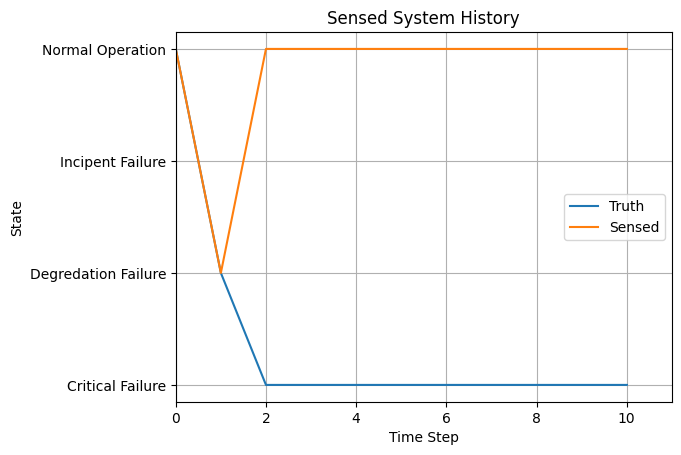

In [92]:
steps = 10

for i in range(steps):
    sys.simulate(1)
    print('Step: ', i)
    sys.outputSystemStates()    
    print('')
sys.plotHistory()

### Simulating a parallel system